# Mac Address Feature Cleaning

The notebook aims at understanding the mac addresses using a clustering algorithm (k-means) to determine whether the mac addresses are stationary or moving (shoppers).

In [3]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.cm as cm
matplotlib.style.use('ggplot')

import mac_address_features as maf

In [4]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Import the data and create mac address data frame

In [44]:
signal_df = maf.import_data('Mall of Mauritius')
mac_address_df = maf.create_mac_address_df(signal_df)

In [45]:
print('{} signals'.format(len(signal_df)))
print('{} mac addresses'.format(len(mac_address_df)))

2762923 signals
154152 mac addresses


## Add the features

In [46]:
mac_address_df['manufacturer'] = maf.find_device_type(mac_address_df)

In [71]:
mac_address_df['gyration'] = np.nan
mac_address_df.loc[:number - 1, 'gyration'] = maf.calculate_radius_gyration(signal_df, mac_address_df[:number])[1]

In [68]:
number = 10000

mac_address_df['cdv'] = np.nan
mac_address_df.loc['cdv'] = maf.count_density_variance(signal_df, mac_address_df, minute_resolution='15')

In [63]:
mac_address_df.head()

,count,mac_address,manufacturer,gyration,cdv
0,6606,bc:20:10:8c:fe:05,NaN,10.848379,50.790938
1,5718,98:fc:11:eb:90:65,"Cisco-Linksys, LLC",20.430586,26.874078
2,5686,c4:f0:81:19:be:fc,"HUAWEI TECHNOLOGIES CO.,LTD",8.211081,45.712970
3,5332,e8:de:27:5e:bf:99,"TP-LINK TECHNOLOGIES CO.,LTD.",47.177085,24.980181
4,5281,9c:99:a0:07:5e:a9,Xiaomi Communications Co Ltd,9.771733,48.059259


## Manufacturer Analysis

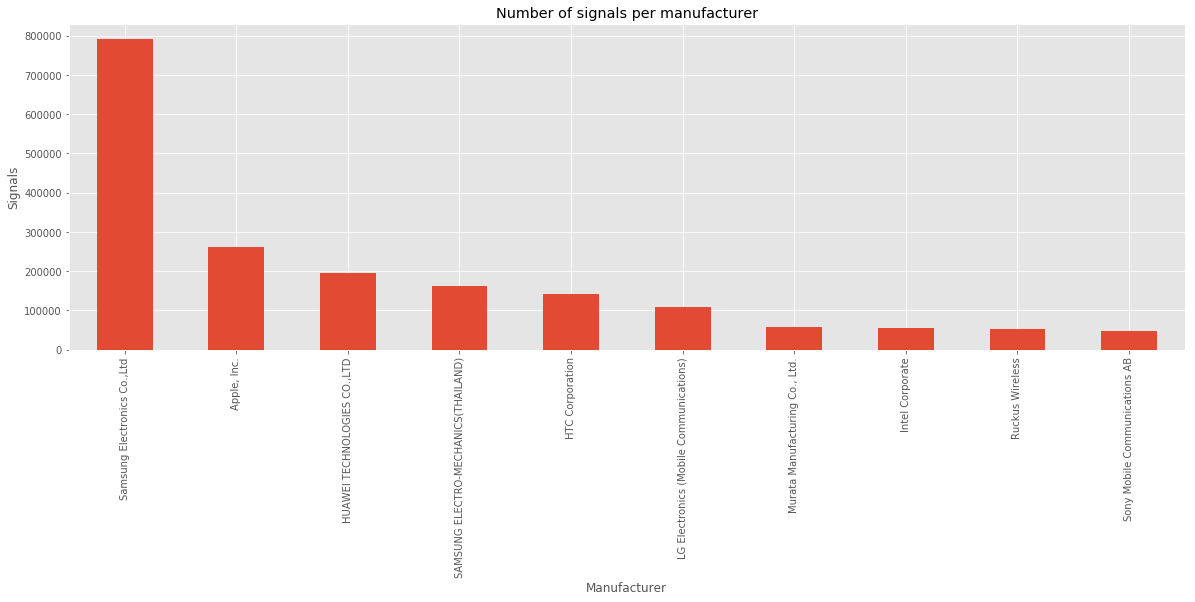

In [41]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20, 6))
ax = signal_df.manufacturer.value_counts()[0:10].plot.bar(ax=axes)
ax.set_title('Number of signals per manufacturer')
ax.set_xlabel('Manufacturer')
ax.set_ylabel('Signals');